1.load the dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file=pd.read_csv("/content/Churn_Modelling.csv")
df=pd.DataFrame(file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype('category')

In [ ]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')

In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1.Perform Below Visualizations:Univariate Analysis,Bi-Variate Analysis,Multi-Variate Analysis

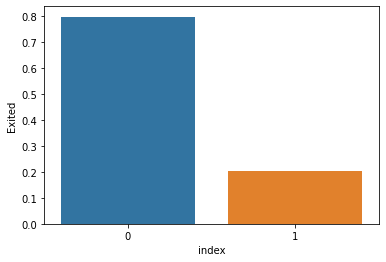

In [ ]:
import seaborn as sns
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );

the data is significantly imbalanced

In [ ]:
import matplotlib.pyplot as plt

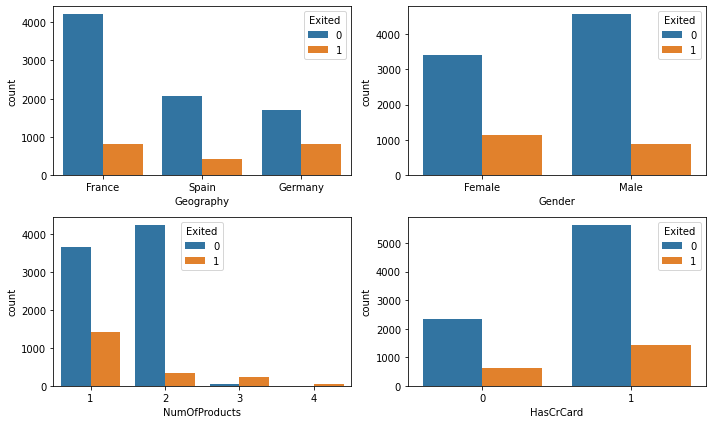

In [ ]:
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col ]     
        ax = axes[row*2 + col]

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
plt.tight_layout()        



1.Perform descriptive statistics on the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 723.0+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


1.Handle the Missing values.

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there is no missing values in dataset

In [ ]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print("unique of "+i+" is "+str(len(set(df[i])))+" they are "+str(set(df[i])))

unique of Geography is 3 they are {'Spain', 'France', 'Germany'}
unique of Gender is 2 they are {'Female', 'Male'}
unique of HasCrCard is 2 they are {0, 1}
unique of IsActiveMember is 2 they are {0, 1}


   1.Find the outliers and replace the outliers

Checking for outliers   



In [ ]:
def box_scatter(data, x, y):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


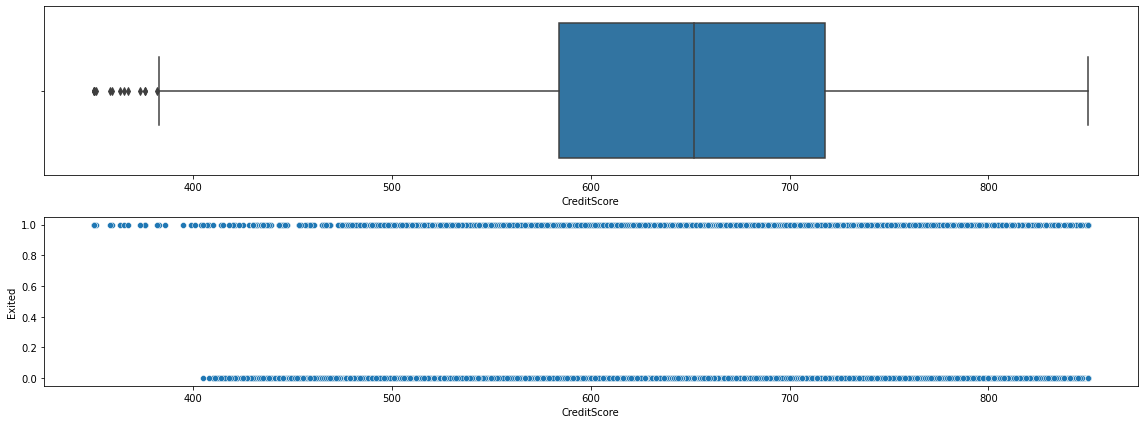

In [ ]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliners: 3


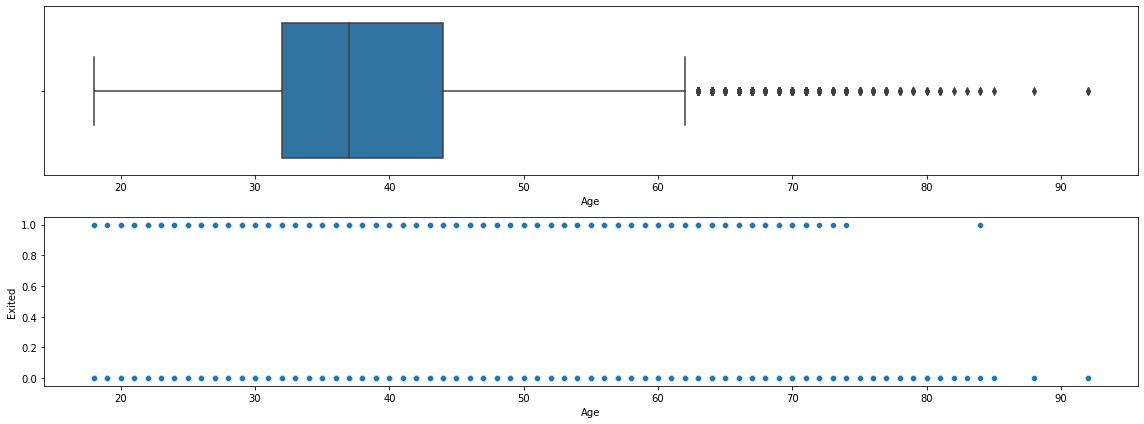

In [ ]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliners: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliners: 4


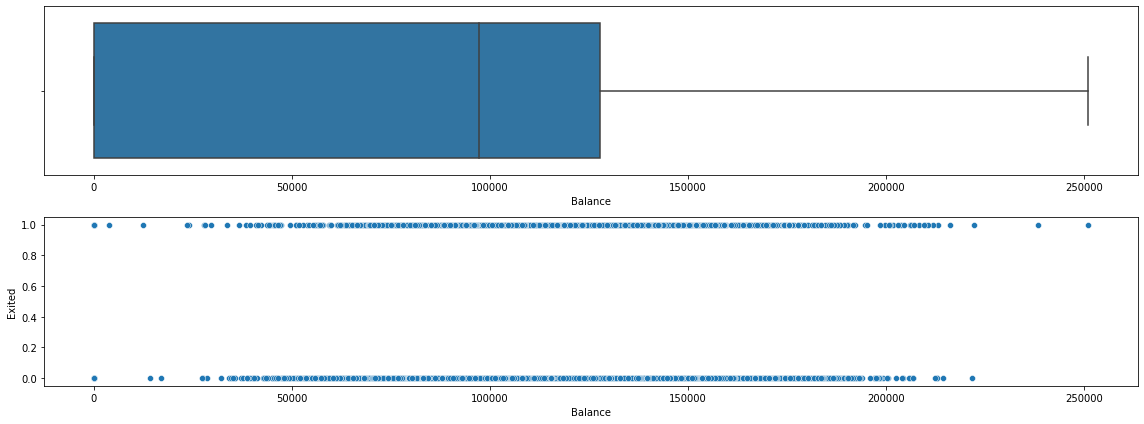

In [ ]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliners: {len(df.loc[df['Balance'] > 220000])}")

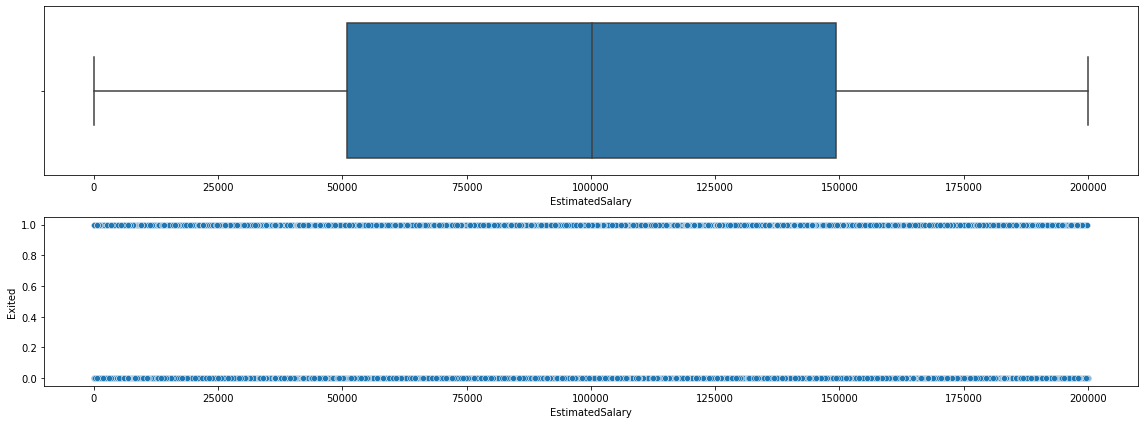

In [ ]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

Removing outliers

In [ ]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
      q1=df[i].quantile(0.25)
      q3=df[i].quantile(0.75)
      iqr=q3-q1
      upper=q3+1.5*iqr
      lower=q1-1.5*iqr
      df[i]=np.where(df[i] >upper, upper, df[i])
      df[i]=np.where(df[i] >lower, lower, df[i])

After removing outliers,boxplot will be like

# of Bivariate Outliers: 10000


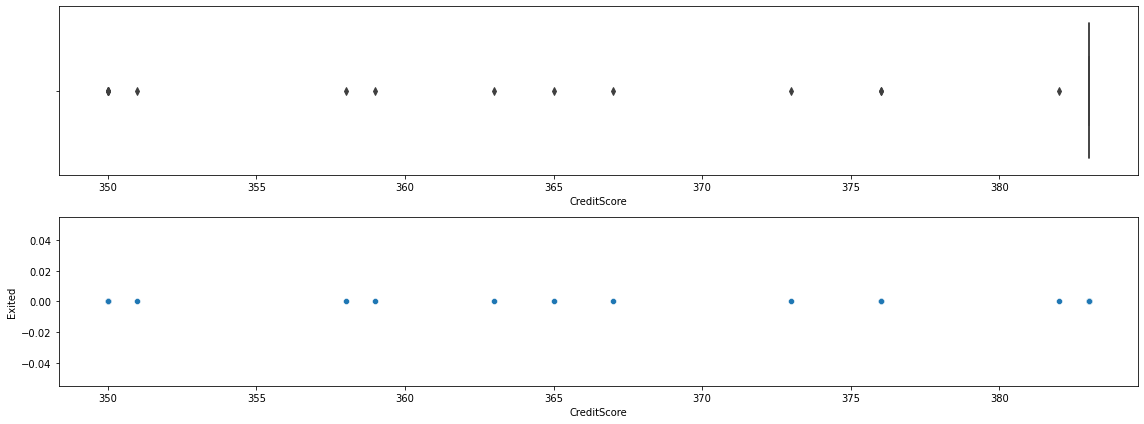

In [ ]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


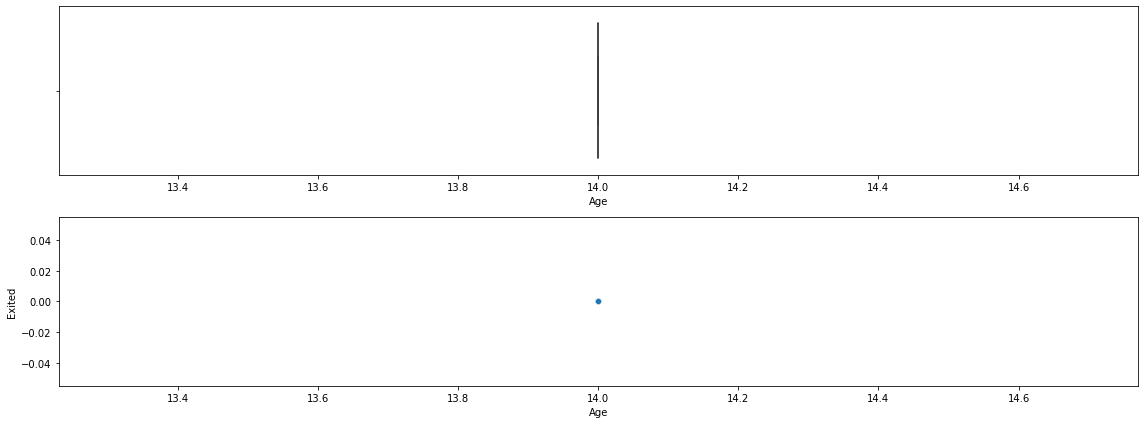

In [ ]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

1.Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

1.Split the data into dependent and independent variables

In [ ]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,383.0,0,0,14.0,-3.0,-191466.36,-0.5,1,1,-96577.09625
1,383.0,2,0,14.0,-3.0,-191466.36,-0.5,0,1,-96577.09625
2,383.0,0,0,14.0,-3.0,-191466.36,-0.5,1,0,-96577.09625
3,383.0,0,0,14.0,-3.0,-191466.36,-0.5,0,0,-96577.09625
4,383.0,2,0,14.0,-3.0,-191466.36,-0.5,1,1,-96577.09625


In [ ]:
y=df.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Exited, dtype: float64

1.Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x

array([[ 3.45697002e-02, -9.01886243e-01, -1.09598752e+00, ...,
         6.46091668e-01,  9.70242551e-01, -2.91038305e-11],
       [ 3.45697002e-02,  1.51506738e+00, -1.09598752e+00, ...,
        -1.54776799e+00,  9.70242551e-01, -2.91038305e-11],
       [ 3.45697002e-02, -9.01886243e-01, -1.09598752e+00, ...,
         6.46091668e-01, -1.03067011e+00, -2.91038305e-11],
       ...,
       [ 3.45697002e-02, -9.01886243e-01, -1.09598752e+00, ...,
        -1.54776799e+00,  9.70242551e-01, -2.91038305e-11],
       [ 3.45697002e-02,  3.06590567e-01,  9.12419150e-01, ...,
         6.46091668e-01, -1.03067011e+00, -2.91038305e-11],
       [ 3.45697002e-02, -9.01886243e-01, -1.09598752e+00, ...,
         6.46091668e-01, -1.03067011e+00, -2.91038305e-11]])

1.Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
x_train.shape

(6700, 10)

In [ ]:
x_test.shape

(3300, 10)

In [ ]:
y_train.shape

(6700,)

In [ ]:
y_test.shape

(3300,)